### Seleção de Modelos

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.model_selection import cross_validate

- Nesta etapa vamos analisar a performance de diferentes tipos de modelos como **Árvores de Decisões**, **K Vizinhos**, **Regressões Logísticas** e **Método de Naive Bayes** presentes no site [Scikit-Learn](https://scikit-learn.org/)

In [2]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    

In [3]:
def get_data(train_path, test_path):

    df_train = pd.read_csv(train_path, header=0)
    df_test = pd.read_csv(test_path, header=0)

    data = df_train.to_numpy()
    n_row, n_col = data.shape
    X = data[:,1:n_col]
    y = data[:,0]
    X_test = df_test.to_numpy()

    return X, y, X_test 

X, y, X_test = get_data("dados/treino_tratado.csv", "dados/teste_tratado.csv")



- Primeiro testamos o modelo de [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). A princípio, não estamos interessados na escolha de hiperparâmetros, vamos utilizar os modelos por *default* e treina-los com o método de **cross validation**.

In [4]:
from sklearn.ensemble import RandomForestClassifier

scoring = ['f1', 'accuracy']

rfc = RandomForestClassifier()
score_rfc = cross_validate(rfc, X, y, scoring=scoring)

print("Resultado do f1_score {:.3f} \n \n Resultado da Acurácia {:.3f}".format(np.mean(score_rfc['test_f1']), 
                                                                             np.mean(score_rfc['test_accuracy'])))


Resultado do f1_score 0.741 
 
 Resultado da Acurácia 0.807


- Agora, testamos o modelo de classificação por [Naive Baies](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes).

In [5]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
score_NB = cross_validate(NB, X, y, scoring=scoring)

print("Resultado do f1_score {:.3f} \n \n Resultado da Acurácia {:.3f}".format(np.mean(score_NB['test_f1']), 
                                                                             np.mean(score_NB['test_accuracy'])))


Resultado do f1_score 0.725 
 
 Resultado da Acurácia 0.783


- Para a aplicação dos outros métodos será necessário realizar o processo de **Padronização** dos dados.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y, X_test = get_data("dados/treino_tratado.csv", "dados/teste_tratado.csv" )

def get_scale(train, test):
    scaler = StandardScaler()
    train = scaler.fit_transform(train)
    test = scaler.transform(test)
    return train, test

X, X_test = get_scale(X, X_test)

- Agora, trainamos o modelo de classificação de [K vizinhos](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors).

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
score_knn = cross_validate(knn, X, y, scoring=scoring)

print("Resultado do f1_score {:.3f} \n \n Resultado da Acurácia {:.3f}".format(np.mean(score_knn['test_f1']), 
                                                                             np.mean(score_knn['test_accuracy'])))


Resultado do f1_score 0.730 
 
 Resultado da Acurácia 0.805


- Por último, utilizamos o modelo de [Regressão Logística](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

In [8]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
score_lg = cross_validate(lg, X, y, scoring=scoring)

print("Resultado do f1_score {:.3f} \n \n Resultado da Acurácia {:.3f}".format(np.mean(score_lg['test_f1']), 
                                                                               np.mean(score_lg['test_accuracy'])))


Resultado do f1_score 0.718 
 
 Resultado da Acurácia 0.790


- Escolhemos as métricas de **F1-score** e **Acurácia** para julgar o desempenho dos modelos;
    - F1-score: Média harmônica de *precision* e *recall*, utilizada para tomar conhecimento dos falsos positivos e falsos negativos;
    - Acurácia: Porcentagem de acertos do total da classificação;

- Com isso, escolhemos os modelos de **Random Forest** e **KNeighbors** para próxima etapa.

### Otimização de Hiperparâmetros

- Nesta etapa, utilizamos o conhecimento teórico dos parâmetros de cada modelo, junto de testes com a função **RandomSearch**, para encontrar melhores hiperparâmetros para esses dados.

- Esta etapa é importante tanto para encontrar os modelos com melhores scores, quanto para encontrar os parâmetros que evitam os problemas de ***Overfitting***.

- Dentre os hiperparâmetros do modelo de Random Forest, estão:
  - **n_estimators**: Número de árvores construídas;
  - **max_depth**: Profundidade das árvores;
  - **criterion**: Formulação matemática para avaliar a divisão de galhos;
  - **min_sample_split**: Número mínimo de amostras para dividir os galhos;
  - **min_sample_leaf**: Número mínimo de amostras para formar uma folha;
  - **class_weight**: Ajusta as amostras de acordo com as classes.

- Agora podemos aplicar o modelo e aprimorá-lo.

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score

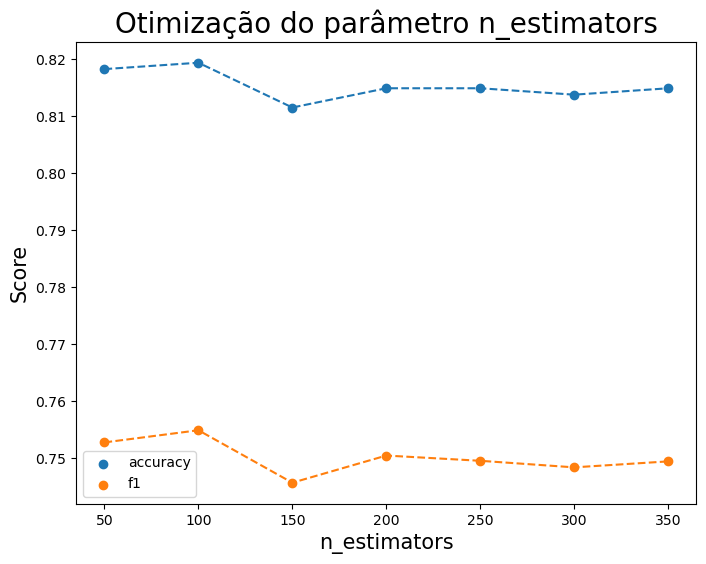

In [10]:
X, y, X_test = get_data("dados/treino_tratado.csv", "dados/teste_tratado.csv")

metrics = ["accuracy", "f1"]
score_rfc = {d: [] for d in metrics}
n_estimators = np.arange(50, 400, 50)

for j in metrics:
    for i in n_estimators:
        rfc_2 = RandomForestClassifier(n_estimators=i, random_state=42)
        resultados = cross_val_score(rfc_2, X, y, cv=5, scoring=j)
        score_rfc[j].append(resultados.mean())

plt.figure(figsize=(8,6))

for d in metrics:
    plt.scatter(list(n_estimators), score_rfc[d], label=d)
    plt.plot(list(n_estimators), score_rfc[d], linestyle="--")

plt.title("Otimização do parâmetro n_estimators", fontsize=20)
plt.xlabel("n_estimators", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.legend()
plt.show()

- Vemos que o melhor parâmetro de **n_estimators** é 100.

In [11]:
rfc_otm = RandomForestClassifier(n_estimators=100, random_state=42)

params = { "max_depth": [ 4, 5, 6, 8, 9],
          "criterion": ["gini", "entropy"],
          "min_samples_split": [10, 20, 30, 40],
          "min_samples_leaf": [5, 10, 15, 20],
          "class_weight": [None, "balanced" ]
}

tun_params = RandomizedSearchCV(rfc_otm, param_distributions=params, cv=5, scoring="accuracy", random_state=42)
model = tun_params.fit(X, y)

print(f"Melhores hiperparâmetros: {model.best_estimator_} \n \n Score Respectivo: {model.best_score_} ")

Melhores hiperparâmetros: RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=20,
                       random_state=42) 
 
 Score Respectivo: 0.8092210156299041 


- Estudamos os seguintes hiperparâmetros do modelo de **KNeighbors**;

    - **n_neighbors**: Número de vizinhos necessário para classificar;
    - **Weights** : Parâmetro utilizado para agregar siginificado das distâncias;
    - **Metric**: Maneira de calcular as distâncias entre os vizinhos;
  

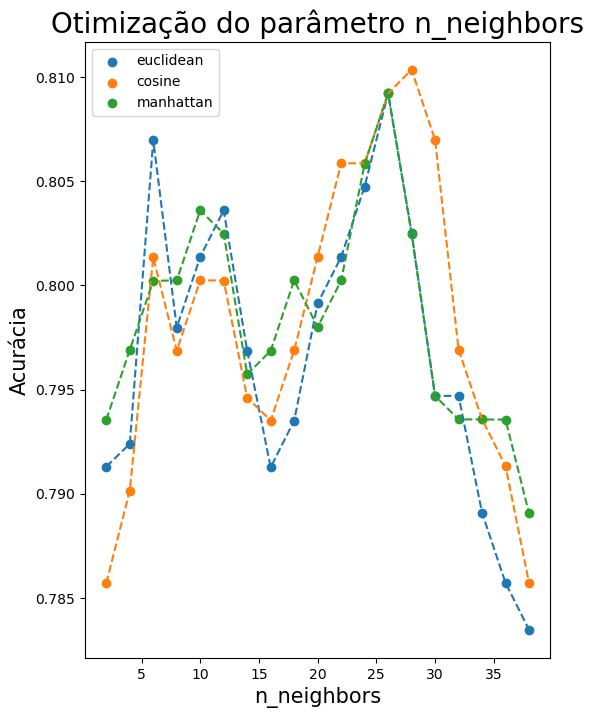

In [12]:

X, X_test = get_scale(X, X_test)

n_neighbors = np.arange(2, 40, 2)
metrics = ["euclidean", 'cosine', 'manhattan']
score_knn = {d: [] for d in metrics}

for i in metrics:
    for j in n_neighbors:
        knn = KNeighborsClassifier(metric=i, n_neighbors=j)
        resultados_knn = cross_val_score(knn, X, y, cv=5, scoring="accuracy")
        score_knn[i].append(resultados_knn.mean())
    
plt.figure(figsize=(6,8))

for d in metrics:
    plt.scatter(list(n_neighbors), score_knn[d], label=d)
    plt.plot(list(n_neighbors), score_knn[d], "--")

plt.title("Otimização do parâmetro n_neighbors", fontsize=20)
plt.xlabel("n_neighbors", fontsize=15)
plt.ylabel("Acurácia", fontsize=15)
plt.legend()
plt.show()


- Optamos por utilizar os parâmetros **n_neighbors = 28** e **metrics = cosine**.

In [13]:
weights = ['uniform', 'distance']

for i in weights:
    knn_2 = KNeighborsClassifier(n_neighbors=28, metric="cosine", weights=i)
    tun_params2 = cross_val_score(knn_2, X, y, cv=5, scoring="accuracy")
    print(f"A acurácia da weights {i} é {np.mean(tun_params2):.3f}")
    print(" ")



A acurácia da weights uniform é 0.810
 
A acurácia da weights distance é 0.783
 


- Obtemos os primeiros modelos de classificação;

- Agora, vamos realizar a predição com os dados de teste e enviar para a análise do Kaggle.

In [14]:
X, y, X_test = get_data("dados/treino_tratado.csv", "dados/teste_tratado.csv")

rfc_final = RandomForestClassifier(max_depth=9, min_samples_leaf=15, min_samples_split=20, random_state=42)
model_rfc = rfc_final.fit(X,y)
y_pred = model_rfc.predict(X_test)

prediction_rfc = pd.DataFrame()

PassengerId = pd.read_csv("dados/passengerid.csv", header=0)
PassengerId = np.array(PassengerId["PassengerId"], dtype="int")
y_pred = np.array(y_pred, dtype="int")
prediction_rfc["PassengerId"] = PassengerId
prediction_rfc["Survived"] = y_pred
prediction_rfc.to_csv('dados/prediction_rfc1.csv', index=False)

In [15]:
X, X_test = get_scale(X, X_test)

knn_final = KNeighborsClassifier(n_neighbors=28, metric='cosine')
model_knn = knn_final.fit(X,y)
y_pred = model_knn.predict(X_test)

prediction_knn = pd.DataFrame()

y_pred = np.array(y_pred, dtype="int")
prediction_knn["PassengerId"] = PassengerId
prediction_knn["Survived"] = y_pred
prediction_knn.to_csv('dados/prediction_knn1.csv', index=False)

- Os reesultados analisados pelo kaggle avaliaram os modelos com os seguinte scores:

    - **Random Forest: 0.78708**;

    - **KNN: 0.77272**;

- Portanto, passamos para próxima etapa, afim de ajustar os dados para o aumento dos scores. 